<a href="https://colab.research.google.com/github/raakeshmahato/Major-Project1/blob/main/Major_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precision, recall, processing time, and F1-score to the evaluation**

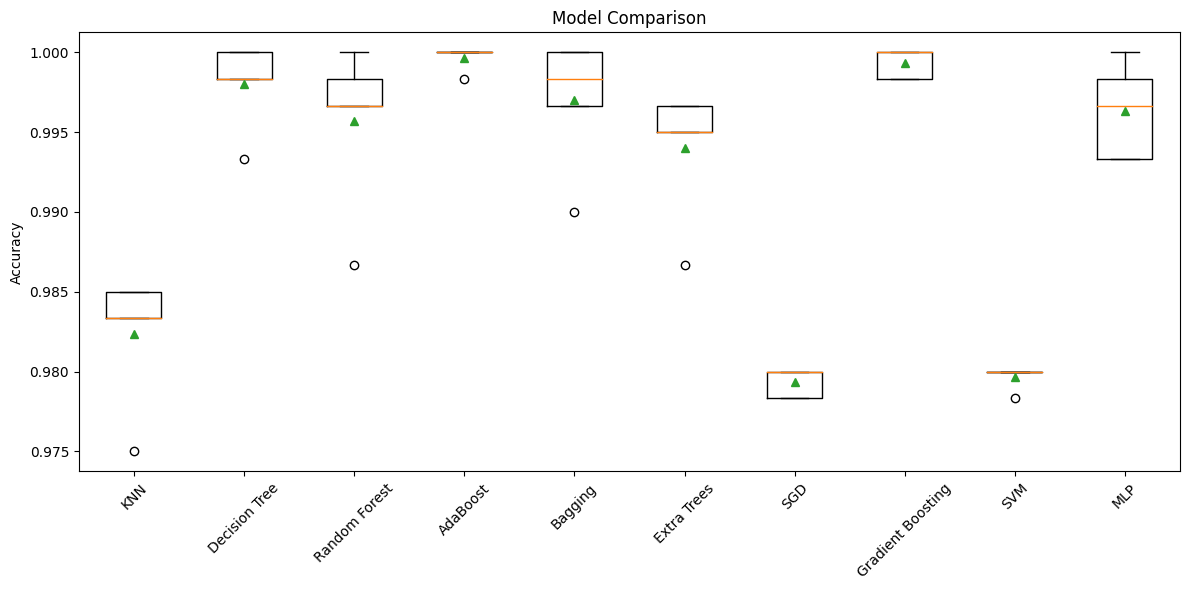

,0,1,2,3,4,Mean Accuracy,Standard Deviation
AdaBoost,1.000000,0.998333,1.000000,1.000,1.000000,0.999667,0.000667
Gradient Boosting,1.000000,0.998333,1.000000,1.000,0.998333,0.999333,0.000816
Decision Tree,1.000000,0.998333,0.993333,1.000,0.998333,0.998000,0.002449
Bagging,1.000000,0.998333,0.990000,1.000,0.996667,0.997000,0.003712
MLP,0.993333,0.996667,0.993333,1.000,0.998333,0.996333,0.002667
Random Forest,0.996667,0.998333,0.986667,1.000,0.996667,0.995667,0.004667
Extra Trees,0.995000,0.996667,0.986667,0.995,0.996667,0.994000,0.003742
KNN,0.983333,0.985000,0.975000,0.985,0.983333,0.982333,0.003742
SVM,0.980000,0.980000,0.980000,0.980,0.978333,0.979667,0.000667
SGD,0.980000,0.980000,0.978333,0.980,0.978333,0.979333,0.000816


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
data = pd.read_csv('/content/vitamin_d_dataset_3000___Rakesh.csv')

# Encoding categorical columns
label_encoders = {}
for column in ['Gender', 'Sun Exposure', 'Dietary Intake', 'Physical Activity']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Separating the features and the target
X = data.drop('Deficiency', axis=1)
y = data['Deficiency'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert to binary

# Define the models
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=30),
    'Random Forest': RandomForestClassifier(random_state=30),
    'AdaBoost': AdaBoostClassifier(random_state=30),
    'Bagging': BaggingClassifier(random_state=30),
    'Extra Trees': ExtraTreesClassifier(random_state=30),
    'SGD': SGDClassifier(random_state=30),
    'Gradient Boosting': GradientBoostingClassifier(random_state=30),
    'SVM': SVC(random_state=30),
    'MLP': MLPClassifier(random_state=30, max_iter=1000)  # Increased max_iter for convergence
}

# Evaluate each model using cross-validation
cv_results = {}
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    cv_results[name] = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Plot the results
plt.figure(figsize=(12, 6))
plt.boxplot(cv_results.values(), labels=cv_results.keys(), showmeans=True)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the results in a table
results_table = pd.DataFrame(cv_results).T
results_table['Mean Accuracy'] = results_table.mean(axis=1)
results_table['Standard Deviation'] = results_table.std(axis=1)
results_table.sort_values(by='Mean Accuracy', ascending=False, inplace=True)

results_table


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [ ]:
# Define scoring metrics for evaluation
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

for name, model in models.items():
    # Create a pipeline with standard scaler and the current model
    pipeline = make_pipeline(StandardScaler(), model)
    # Perform cross-validation and store the results
    cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring)
    # Append the mean of the scores for each model to the results DataFrame
    results = results.append({'Model': name,
                              'Accuracy': np.mean(cv_results['test_accuracy']),
                              'Precision': np.mean(cv_results['test_precision']),
                              'Recall': np.mean(cv_results['test_recall']),
                              'F1': np.mean(cv_results['test_f1'])},
                             ignore_index=True)

# Sort the results for better visualization
results.sort_values(by='F1', ascending=False, inplace=True)


<ipython-input-24-d6a5f4e708c8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name,
<ipython-input-24-d6a5f4e708c8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name,
<ipython-input-24-d6a5f4e708c8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name,
<ipython-input-24-d6a5f4e708c8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Model': name,
<ipython-input-24-d6a5f4e708c8>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

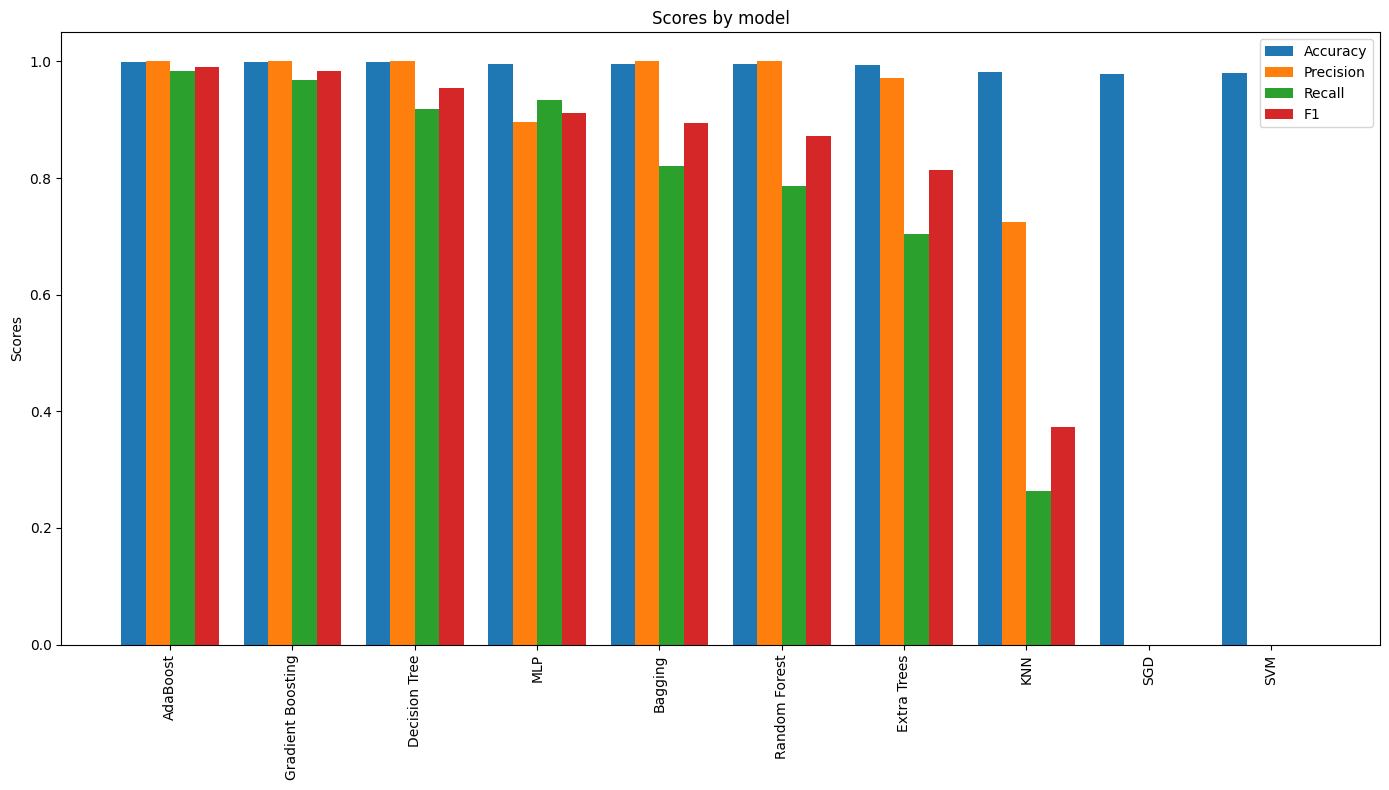

In [ ]:
# Set figure size
plt.figure(figsize=(14, 8))

# Number of models
n_models = len(results)

# X locations for the groups
ind = np.arange(n_models)

# Width of the bars
width = 0.2

# Plotting
plt.bar(ind - width*1.5, results['Accuracy'], width, label='Accuracy')
plt.bar(ind - width/2, results['Precision'], width, label='Precision')
plt.bar(ind + width/2, results['Recall'], width, label='Recall')
plt.bar(ind + width*1.5, results['F1'], width, label='F1')

# Add some text for labels, title, and custom x-axis tick labels, etc.
plt.ylabel('Scores')
plt.title('Scores by model')
plt.xticks(ind, results['Model'], rotation='vertical')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print(results)


               Model  Accuracy  Precision    Recall        F1
3           AdaBoost  0.999667   1.000000  0.983333  0.991304
7  Gradient Boosting  0.999333   1.000000  0.967949  0.983304
1      Decision Tree  0.998333   1.000000  0.917949  0.954733
9                MLP  0.996333   0.895897  0.934615  0.912444
4            Bagging  0.996333   1.000000  0.820513  0.894404
2      Random Forest  0.995667   1.000000  0.785897  0.871607
5        Extra Trees  0.993667   0.971429  0.703846  0.813476
0                KNN  0.982333   0.725000  0.262821  0.372647
6                SGD  0.979333   0.000000  0.000000  0.000000
8                SVM  0.979667   0.000000  0.000000  0.000000


<ipython-input-27-979647b01349>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({
<ipython-input-27-979647b01349>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({
<ipython-input-27-979647b01349>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_table.append({


               Model  Accuracy  Precision    Recall        F1
1  Gradient Boosting  0.999333        1.0  0.967949  0.983304
2   Voting (RF + GB)  0.998667        1.0  0.934615  0.965123
0      Random Forest  0.995667        1.0  0.785897  0.871607


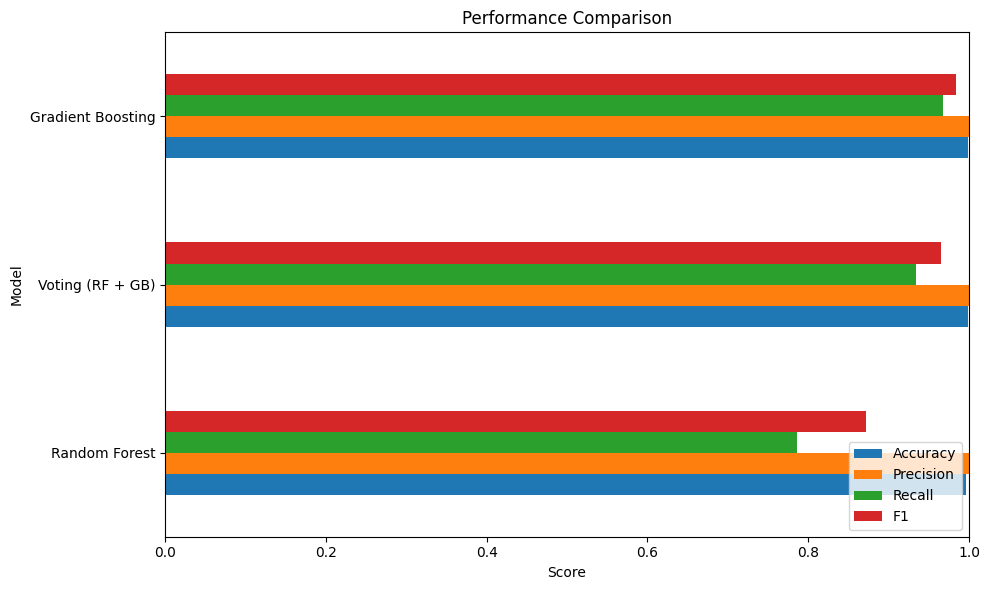

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X and y are already defined
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

# Add a Voting Classifier that ensembles Random Forest and Gradient Boosting
models['Voting (RF + GB)'] = VotingClassifier(estimators=[
    ('rf', models['Random Forest']),
    ('gb', models['Gradient Boosting'])],
    voting='soft')

# Prepare the results dictionary
results = {name: cross_validate(model, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
           for name, model in models.items()}

# Process results for table and graph
results_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
for name, metrics in results.items():
    results_table = results_table.append({
        'Model': name,
        'Accuracy': np.mean(metrics['test_accuracy']),
        'Precision': np.mean(metrics['test_precision']),
        'Recall': np.mean(metrics['test_recall']),
        'F1': np.mean(metrics['test_f1'])
    }, ignore_index=True)

# Display results table
print(results_table.sort_values(by='F1', ascending=False))

# Plotting
results_table.set_index('Model').sort_values(by='F1', ascending=True)[['Accuracy', 'Precision', 'Recall', 'F1']].plot(kind='barh', figsize=(10, 6))
plt.title('Performance Comparison')
plt.xlabel('Score')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


## **Code for Feature Selection**

**Filter Methods**

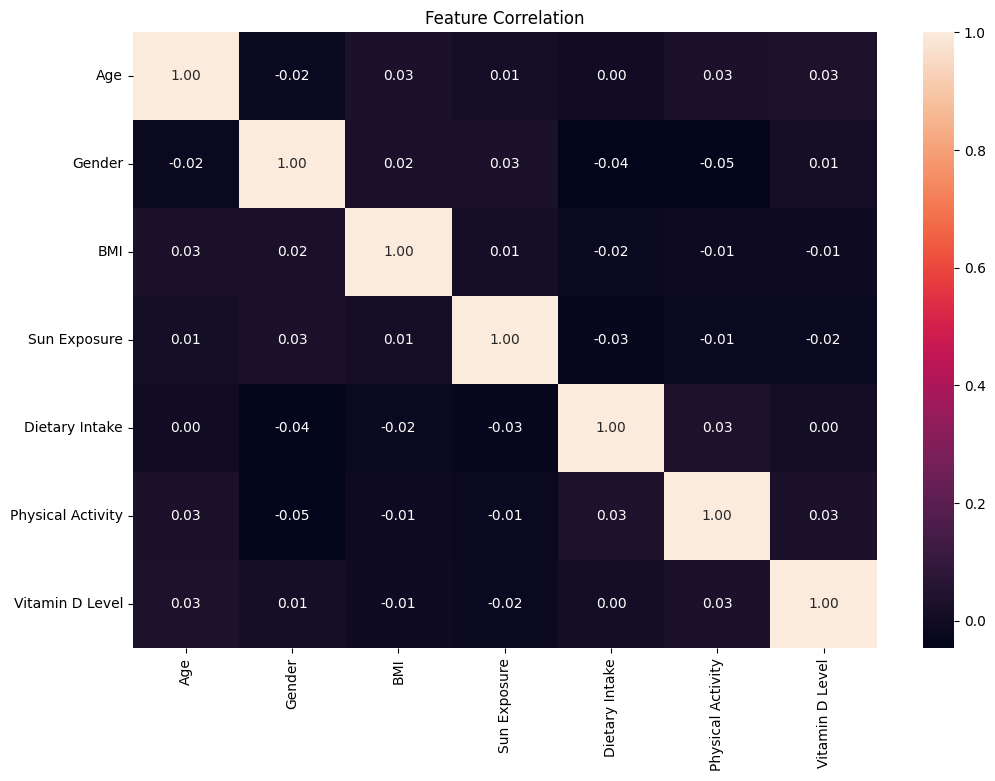

<ipython-input-37-88de5d5d7d3b>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  selected_features = corr.columns[corr[corr.index == y_train.name].abs() > 0.3].tolist()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = X_train.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Feature Correlation")
plt.show()

# Select features with low correlation to each other but high correlation to the target variable
# Assuming 'y_train' is a Series with a name that matches one of the columns in 'X_train' for correlation calculation
selected_features = corr.columns[corr[corr.index == y_train.name].abs() > 0.3].tolist()

# Update X_train and X_test to only include selected features
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]



**Wrapper Methods**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the base classifier
base_classifier = RandomForestClassifier(random_state=42)

# Initialize RFE with the base classifier
rfe = RFE(estimator=base_classifier, n_features_to_select=5)  # Adjust 'n_features_to_select' as needed

# Fit RFE
rfe.fit(X_train, y_train)

# Transform training and test sets
X_train_wrapper = rfe.transform(X_train)
X_test_wrapper = rfe.transform(X_test)

# Selected features
selected_features_wrapper = X_train.columns[rfe.support_]
print("Selected Features:", selected_features_wrapper)


Selected Features: Index(['Age', 'BMI', 'Sun Exposure', 'Dietary Intake', 'Vitamin D Level'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and it's already loaded

# Split the dataset into features (X) and target (y)
# This assumes 'Deficiency' is your target variable; replace it with your actual target variable's name
X = data.drop('Deficiency', axis=1)
y = data['Deficiency']  # Adjust this line to match your target variable's actual name

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate the correlation matrix for X_train and visualize it with a heatmap
plt.figure(figsize=(12, 8))
corr = X_train.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# Temporarily add the target variable to X_train for correlation calculation
X_train_with_target = X_train.copy()
X_train_with_target['Target'] = y_train  # Replace 'Target' with your actual target variable's name

# Calculate the correlation matrix including the target
corr_with_target = X_train_with_target.corr()

# Select features based on their correlation with the target
# Adjust the 'Target' and threshold as needed
target_corr = corr_with_target['Target'].abs()  # Use the actual target variable's name
selected_features = target_corr[target_corr > 0.3].index.tolist()  # Threshold for significant correlation
selected_features.remove('Target')  # Remove the target variable from the list of selected features

# Update X_train and X_test to only include selected features
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

# Now, X_train_filtered and X_test_filtered contain only the features selected based on their correlation with the target.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Decision Tree
depth_values = range(1, 15)
dt_scores = []

for d in depth_values:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    pipeline = make_pipeline(StandardScaler(), dt)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    dt_scores.append(scores.mean())

# Random Forest
estimator_values = [10, 50, 100, 200]
rf_scores = []

for e in estimator_values:
    rf = RandomForestClassifier(n_estimators=e, random_state=42)
    pipeline = make_pipeline(StandardScaler(), rf)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    rf_scores.append(scores.mean())

# AdaBoost
ada_scores = []

for e in estimator_values:
    ada = AdaBoostClassifier(n_estimators=e, random_state=42)
    pipeline = make_pipeline(StandardScaler(), ada)
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    ada_scores.append(scores.mean())

# Plotting Decision Tree results
plt.figure(figsize=(10, 5))
plt.plot(depth_values, dt_scores, marker='o', label='Decision Tree')
plt.title('Classifier Accuracy for different hyperparameters')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)

# Plotting Random Forest results
plt.plot(estimator_values, rf_scores, marker='o', label='Random Forest')

# Plotting AdaBoost results
plt.bar(estimator_values, ada_scores, label='AdaBoost', alpha=0.5)

plt.legend()
plt.show()

# Displaying results in tables
dt_results_table = pd.DataFrame({
    'Max Depth': depth_values,
    'Decision Tree Accuracy': dt_scores
}).sort_values(by='Decision Tree Accuracy', ascending=False)

rf_results_table = pd.DataFrame({
    'Number of Estimators': estimator_values,
    'Random Forest Accuracy': rf_scores
}).sort_values(by='Random Forest Accuracy', ascending=False)

ada_results_table = pd.DataFrame({
    'Number of Estimators': estimator_values,
    'AdaBoost Accuracy': ada_scores
}).sort_values(by='AdaBoost Accuracy', ascending=False)

print("Decision Tree Results:")
print(dt_results_table.head())
print("\nRandom Forest Results:")
print(rf_results_table.head())
print("\nAdaBoost Results:")
print(ada_results_table.head())


TypeError: Singleton array array(Ellipsis, dtype=object) cannot be considered a valid collection.